# INF285 - Computación Científica
# Tarea 0 - Parte 2
## 21-22 de marzo de 2024

## Estimación de pi

Esta famosa constante matemática $\pi = 3.14159265359$ podemos estimarla utilizando el método de Monte Carlo, el cual consiste en obtener una cantidad de muestras aleatorias para realizar un cálculo numérico. En este caso obtendremos muestras aleatorias para obtener una estimación de $\pi$.

La idea es simular puntos aleatorios $(x,y)$ dentro de un cuarto de circunferencia de radio $1$. El objetivo es contar la cantidad de puntos que hay en el cuarto de circunferencia, de tal forma de encontrar una relación entre el área del cuarto de circunferencia y el área total de muestreo.

En el siguiente gráfico se muestra una idea:

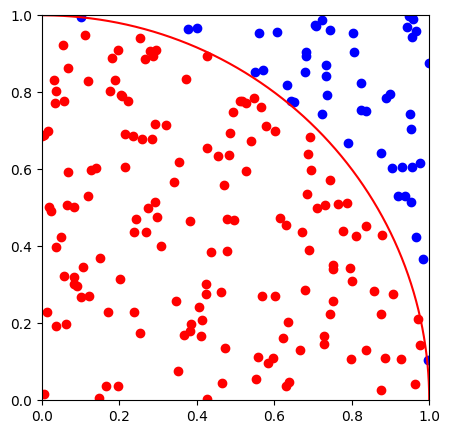

Sabemos que el área del espacio de muestreo es $1$, mientras que el área del cuarto de circunferencia es $\pi/4$. Por lo tanto la razón entre las áreas es:
$$
\dfrac{\text{area cuarto de circunferencia}}{\text{area total}} = \dfrac{\pi/4}{1}
$$

Luego si tomamos una gran cantidad de muestras aleatorias, entonces:
$$
\dfrac{\text{area cuarto de circunferencia}}{\text{area total}} = \dfrac{\text{cantidad de puntos dentro del cuarto de circunferencia}}{\text{cantidad de muestras totales}} = \pi/4
$$
Entonces podemos estimar $\pi$ como:
$$
\pi \approx \dfrac{4 \times \text{cantidad de puntos dentro del cuarto de circunferencia}}{\text{cantidad de muestras totales}}
$$

A continuación se muestra un código que estima $\pi$ utilizando list comprehension:

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from random import random

In [40]:
'''
input
n    : (int)    number of random points.

output
pi_a : (double) approximation of pi.
'''
def calcular_pi_list(n):
    np.random.seed(seed=9999)
    x = [random() for i in range(n)]
    y = [random() for i in range(n)]

    print(x,y)
    d = [x[i]**2 + y[i]**2 for i in range(n)]
    inside = 0
    for i in range(n):
        if d[i] < 1:
            inside += 1
    pi_a = 4*inside / n
    return pi_a

Podemos calcular el tiempo que se demora estimar $\pi$ con list comprehension utilizando $10000$ muestras aleatorias

In [41]:
#tiempo de función con lista
t1 = %timeit -o calcular_pi_list(10000)

[0.25370234229875044, 0.9913605292087571, 0.17552881809581267, 0.9351031536860082, 0.6817203181490386, 0.20284989612368676, 0.6748576368864384, 0.6438409620393347, 0.8621866353035733, 0.19394708742915, 0.49491599180651746, 0.4992632202610807, 0.8045949742571209, 0.014797751289231997, 0.2956401491904541, 0.14878599432992956, 0.9342452827199672, 0.8121538788075164, 0.7171883449039171, 0.8678210757915171, 0.3739841805908193, 0.3409793637810187, 0.8980853270429153, 0.6981733837112463, 0.8591344246809269, 0.05890690615104177, 0.6148803472465602, 0.7499466518963326, 0.33427061928345625, 0.21565606088602307, 0.795255079022919, 0.08598579960646557, 0.058248698330301996, 0.8482039017937169, 0.2968923782355982, 0.9132266966985337, 0.0910991404105076, 0.9331662500769236, 0.7225837277479922, 0.1902001089149028, 0.42712147776329146, 0.02784128898855953, 0.5882088986421247, 0.6349644091267438, 0.17809930355912595, 0.8370479427619533, 0.05261585435301841, 0.2581806727373117, 0.7221891093899918, 0.173

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



**Pregunta 1 (20 puntos)**
Construya la función *calcular_pi_array(n)* que estime el valor de $\pi$ utilizando `numpy array` y considerando $n$ muestras aleatorias. Usted debe utilizar la siguiente firma:

In [30]:
'''
input
n    : (int)    number of random points.

output
pi_a : (double) approximation of pi.
'''
def calcular_pi_array(n):
    np.random.seed(seed=9999)
    #acá va su código
    #--------------------------------
    x = np.random.rand(n)
    y = np.random.rand(n)

    d = np.power(x,2) + np.power(y,2)
    inside = np.count_nonzero(d < 1)
    #--------------------------------
    pi_a = 4*inside / n
    return pi_a


Podemos calcular el tiempo que se demora estimar $\pi$ con `numpy array` utilizando $10000$ muestras aleatorias.

In [31]:
#tiempo de función con array
t2 = %timeit -o calcular_pi_array(10000)

885 µs ± 135 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Se calcula las veces que estimar $\pi$ con `numpy array` es mejor que con list comprehension.

In [32]:
t1.average/t2.average

32.0479851626918

La función que acaba de escribir, se vectoriza.

In [33]:
#se vectoriza la función
calcular_pi_array_vec = np.vectorize(calcular_pi_array)

**Pregunta 2 (20 puntos)**
El error exacto $E_e(n)$ utilizando $n$ muestras aleatorias, viene dado por:
$$
E_e(n) = |\pi - \pi_n|
$$
donde $\pi_n$ es la estimación de $\pi$ utilizando $n$ muestras aleatorias.
Por otro lado, $E_a(n)$ es el error de aproximación de la estimación de $\pi$ utilizando $n$ muestras aleatorias:
$$
E_a(n) = |\pi_{n_{max}} - \pi_n|
$$
donde $\pi_{n_{max}}$ es la estimación de $\pi$ utilizando la máxima cantidad de muestras aleatorias.
Al graficar estos errores para cada $n$ en escala logarítmica, se puede observar que tienen una tendencia lineal. Al ejecutar el siguiente código usted notará la distribución de los errores:

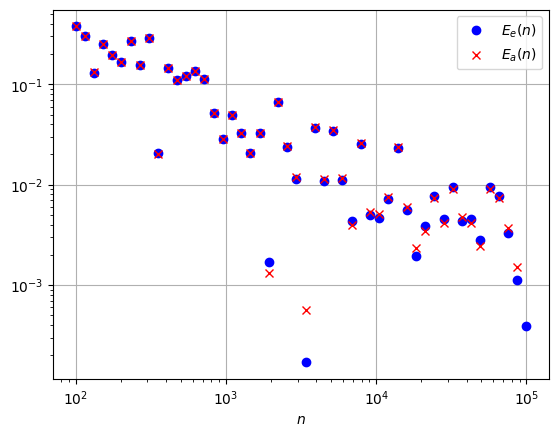

In [34]:
#plotear la curva del error exacto y aproximado
n = np.logspace(2,5,50,dtype=int)
pi_n = calcular_pi_array_vec(n)

error_ex = np.abs(np.pi-pi_n)
plt.loglog(n,error_ex,"bo",label=r"$E_e(n)$")

error_ap = np.abs(pi_n[-1] - pi_n[:-1])
plt.loglog(n[:-1],error_ap,"rx",label=r"$E_a(n)$")

plt.xlabel(r"$n$")
plt.legend()
plt.grid()
plt.show()

Entonces el error viene dado por una función de potencia $E = c\,n^\alpha$. Aplicando logaritmo se obtiene que:
$$
\log(E) = \log(c) + \alpha\,\log(n)
$$
Se solicita entonces, obtener el valor de $\alpha$ mediante el uso de *regresión lineal*. Este valor es la pendiente de la recta de regresión que pasa por los puntos graficados anteriormente. Debe realizar este cálculo tanto para el error exacto como para el error de aproximación. Usted debe usar la siguiente firma:

In [35]:
#calcular pendiente de la curva de la regresión para el error exacto
'''
input
n_arr    :(ndarray) array with n values.
error_ex :(ndarray) array with n exact errors.

output
alpha    :(double)  slope of regression line.
'''
def errorExacto_slope(n_arr,error_ex):
  #acá va su código
  #--------------------------------
  m, b = np.polyfit(np.log(n_arr), np.log(error_ex), 1)
  alpha = m
  #--------------------------------
  return alpha

In [36]:
#calcular pendiente de la curva de la regresión para el error aproximado
'''
input
n_arr    :(ndarray) array with n values.
error_ap :(ndarray) array with n approximation errors.

output
alpha    :(double)  slope of regression line.
'''
def errorAprox_slope(n_arr,error_ap):
  #acá va su código
  #--------------------------------
  m, b = np.polyfit(np.log(n_arr), np.log(error_ap), 1)
  alpha = m
  #--------------------------------
  return alpha

**Pregunta 3**
Sea la integral,
$$
I = \int_{2\pi}^{11\pi/4} g(t)\,dt = \int_{2\pi}^{11\pi/4} (3\sin(t) + \cos(t))\,dt
$$
donde $2\pi \leq t \leq 11\pi/4$ y $0 \leq g(t) \leq 4$.

**3.1 (20 puntos)** Utilizando el método de Monte Carlo aplicado anteriormente para la estimación de $\pi$, estime la integral $I$ utilizando $n$ muestras aleatorias. Usted debe utilizar la siguiente firma:

In [37]:
#calcular la integral de f(x) utilizando el método de Monte Carlo
'''
input
n     :(int)    number of points.

output
e_int :(double) estimation of integral.
'''
def estimar_integral(n):
    np.random.seed(seed=9999)
    #acá va su código
    #--------------------------------
    x_low = 2*np.pi
    x_high = 11*np.pi/4

    y_low = 0
    y_high = 4

    x = np.random.uniform(x_low,x_high,size=n)
    y = np.random.uniform(y_low,y_high,size=n)

    edge = np.sin(x)*3 + np.cos(x)

    total_area = (x_high - x_low) * (y_high - y_low)

    inside = np.count_nonzero(y <= edge)

    e_int = total_area * inside / n
    #--------------------------------
    return e_int

**3.2 (15 puntos)** Grafique el error de aproximación $E_a(n)$ para la estimación de la integral $I$ para $n \in [10^2,10^6]$. Usted debe utilizar la siguiente firma, donde ```f``` es la función que estima la integral $I$ y ```m``` es la cantidad de errores a graficar.  

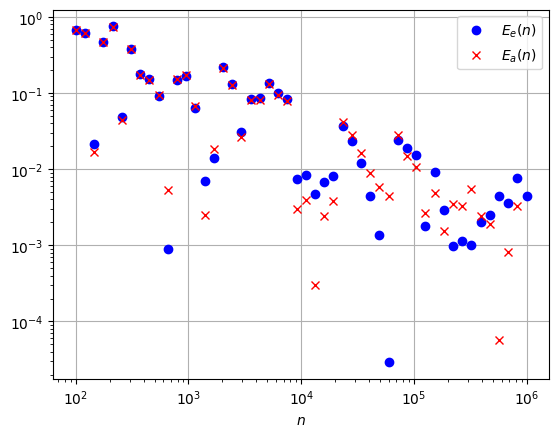

In [38]:
'''
input
m     :(int)      number of errors to plot.
f     :(callable) function that estimates the integral.
'''
def plot_error_ap(m,f):
  #acá va su código
  #--------------------------------
  #plotear la curva del error exacto y aproximado
  n = np.logspace(2,6,m,dtype=int)
  calcular_integral_array_vec = np.vectorize(f)
  I_n = calcular_integral_array_vec(n)

  I_real = 2*np.sqrt(2) + 3

  error_ex = np.abs(I_real-I_n)
  plt.loglog(n,error_ex,"bo",label=r"$E_e(n)$")

  error_ap = np.abs(I_n[-1] - I_n[:-1])
  plt.loglog(n[:-1],error_ap,"rx",label=r"$E_a(n)$")

  plt.xlabel(r"$n$")
  plt.legend()
  plt.grid()
  #--------------------------------
  plt.show()

m = 50
plot_error_ap(m,estimar_integral)

**3.3 (15 puntos)** Calcule el valor de $\alpha$ utilizando *regresión lineal* para la recta de regresión del error de aproximación. Usted debe utilizar la siguiente firma:

In [39]:
#cálculo de alpha
'''
input
n_arr    :(ndarray) array with n values.
error_ap :(ndarray) array with n approximation errors.

output
alpha    :(double)  slope of regression line.
'''
def error_slope(n_arr,error_ap):
  #acá va su código
  #--------------------------------
  m, b = np.polyfit(np.log(n_arr), np.log(error_ap), 1)
  alpha = m
  #--------------------------------
  return alpha